# MAP433 - EN5

### *Groupe 43 : WANG XIAOZHEN & LAHIANI MAZIGH & CHEN YUNHAO* 

In [44]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import scipy.stats as sps
import math

## 1. Modèle de Poisson 

### Question 1

In [58]:
def f(N_realisation, n, theta):
    X_moyenne = []
    for i in range(N_realisation):
        X = npr.poisson(theta,n)
        moyenne = np.mean(X)
        X_moyenne.append(moyenne)
    plt.title(r"La distribution de $\overline{X}_n$" + f" avec n={n}")
    plt.hist(X_moyenne, bins = 40, color = 'r', edgecolor = 'black')
    plt.vlines(5, 0, 1500, colors = 'b')
    plt.annotate(f'la vraie valeur de theta: {theta}', xy = (5, 1000), xytext =(0.6,0.7),
                textcoords="axes fraction", arrowprops=dict(facecolor='blue'))
    plt.show()

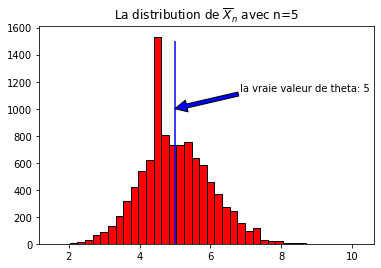

In [59]:
n = 5
theta = 5
N_realisation = 10000

f(N_realisation, n, theta)

### Question 2

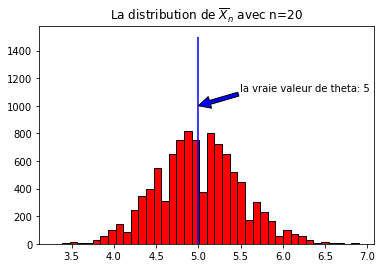

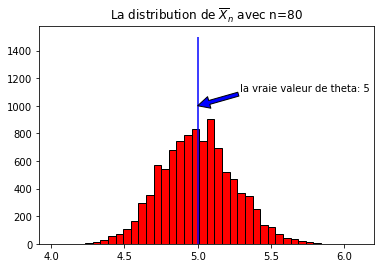

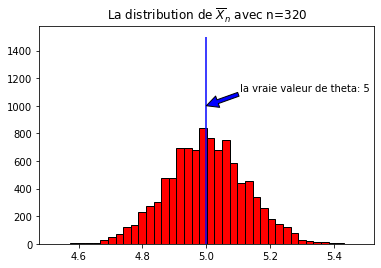

In [60]:
theta = 5
N_realisation = 10000
for n in [20, 80, 320]:
    f(N_realisation, n, theta)

On peut remarquer que avec l'augmentation de $n$, la distribution de $X_n$ ressemble de plus en plus à celle d'une gaussienne dont l'espérance égale à 5 (la vraie valeur $\theta$). De plus, la variance de la gaussienne devient de plus en plus petite. Autrement dit, la distribution devient plus concentrée.

### Question 3

La moyenne d'une loi de Poisson de paramètre $\theta$ est $\theta$. Sa variance est aussi $\theta$.

D'après le théorème de la limite centrale, 
$\sqrt{n}(\overline{X}_n-\theta)$ converge en loi vers une gaussienne $N(0,\theta)$.

Cela montre que la suite {$\overline{X}_n, n \in \mathbb{N}$} est asymptotiquement normale. Sa moyenne asymptotique égale à $\theta$. Sa variance asymptotique égale à $\frac{\theta}{n}$.

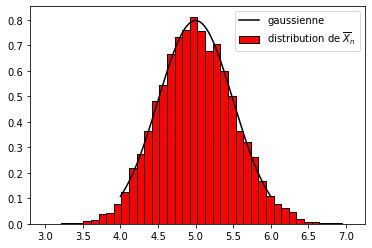

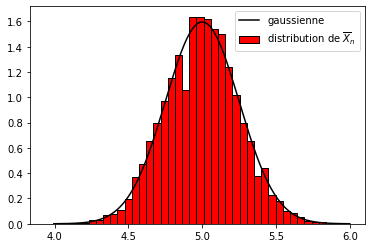

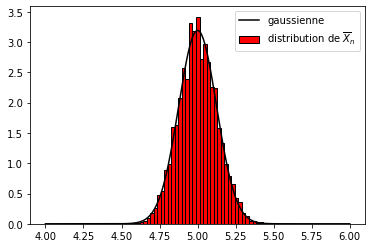

In [85]:
theta = 5
N_realisation = 10000
xx = np.linspace(4, 6, 400)

for n in [20, 80, 320]:
    X_moyenne = []
    for i in range(N_realisation):
        X = sps.poisson.rvs(mu=theta,size=n)
        moyenne = np.mean(X)
        X_moyenne.append(moyenne)
    
    plt.hist(X_moyenne, bins = 40, density=True, color = 'r', edgecolor = 'black',label='distribution de $\overline{X}_n$')
    plt.plot(xx, sps.norm.pdf(xx, loc = theta, scale = np.sqrt(theta/n)), color='black',label='gaussienne')
    plt.legend(loc='best')
    plt.show()

## Transformation de stabilisation de la variance    

### Question 1

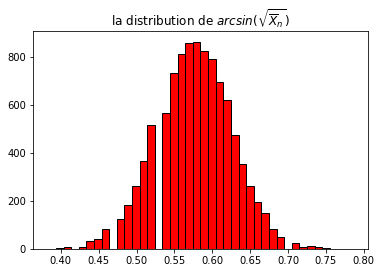

Pour les valeurs obtenues, la moyenne est 0.5788269226784072
Pour les valeurs obtenues, la varience est 0.002521605064625192


In [79]:
theta = 0.3
n = 100
N_realisation = 10000

arcSqXn_list = []
for i in range(N_realisation):
    sample = sps.binom.rvs(n, theta)
    Xn = np.sum(sample) / n
    arcSqXn = math.asin(np.sqrt(Xn))
    arcSqXn_list.append(arcSqXn)
    
plt.hist(arcSqXn_list, bins = 40, color = 'r', edgecolor = 'black')
plt.title(r"la distribution de $arcsin(\sqrt{\overline{X}_n})$")
plt.show()
print(r"Pour les valeurs obtenues, " + f"la moyenne est {np.mean(arcSqXn_list)}")
print(r"Pour les valeurs obtenues, " + f"la varience est {np.var(arcSqXn_list)}")

D'après l'équation 1, on déduit que la moyenne de $arcsin(\sqrt{\overline{X}_n})$ est $arcsin(\sqrt{\theta}) = 0.5796$. Sa variance est $\frac{1}{4n} = 0.0025$. 

Les résultats calculés à partir d'expérience correspondent bien au résultat théorique.

### Question 2

In [84]:
theta = 0.3
n = 100
N_realisation = 10000

nomber = 0
for i in range(N_realisation):
    sample = sps.binom.rvs(n, theta)
    Xn = np.sum(sample) / n
    arcSqXn = math.asin(np.sqrt(Xn))
    left = math.sin(arcSqXn - sps.norm.ppf(0.975)/(2*np.sqrt(n)))**2
    right = math.sin(arcSqXn + sps.norm.ppf(0.975)/(2*np.sqrt(n)))**2
    if (theta >= left) and (theta <= right):
        nomber = nomber + 1
prop = nomber / N_realisation

print(f"Le taux de couverture de l'intervalle est {prop}")

Le taux de couverture de l'intervalle est 0.9492


On peut remarquer que ce taux calculé correspond bien à la valeur théorique, soit 0.95 ici.